#### Aim: of this notebook is to get a timestamp-scan mapping AND AMCL pose prediction for ROS

In [1]:
import rosbag
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
import sensor_msgs.point_cloud2 as pc2
import rospy
from sensor_msgs.msg import PointCloud2, LaserScan
import math
import rosbag
import matplotlib.pyplot as plt
import pickle

In [3]:
import open3d as o3d
import numpy as np
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
EXP_NAME = "exp_1"

In [5]:
bag_file_name = "/home/anmolagarwal/Desktop/bag_by_parth.bag"

## Look at what sort of pose information is present

In [6]:
bag = rosbag.Bag(bag_file_name)
all_timestamps = []
amcl_poses = []
for topic, msg, t in bag.read_messages(topics=['/amcl_pose']):
    #print(msg)
    #print(msg.header.stamp)
    all_timestamps.append(msg.header.stamp)
    amcl_poses.append(   [msg.header.stamp, msg.pose.pose     ])
    #print("###########################")
    #break
bag.close()

In [7]:
len(all_timestamps), all_timestamps

(389,
 [genpy.Time[1668427299336005313],
  genpy.Time[1668427404401142699],
  genpy.Time[1668427404936613051],
  genpy.Time[1668427405242593256],
  genpy.Time[1668427405546692474],
  genpy.Time[1668427405850379285],
  genpy.Time[1668427406157490682],
  genpy.Time[1668427406461677813],
  genpy.Time[1668427406769718524],
  genpy.Time[1668427407072582032],
  genpy.Time[1668427407379583946],
  genpy.Time[1668427407686548611],
  genpy.Time[1668427407990879785],
  genpy.Time[1668427408297853500],
  genpy.Time[1668427408601661600],
  genpy.Time[1668427408907232901],
  genpy.Time[1668427409212910895],
  genpy.Time[1668427409516613301],
  genpy.Time[1668427409823706476],
  genpy.Time[1668427410131207999],
  genpy.Time[1668427410431742275],
  genpy.Time[1668427410738819500],
  genpy.Time[1668427411045717928],
  genpy.Time[1668427411349858741],
  genpy.Time[1668427411653678596],
  genpy.Time[1668427412038996560],
  genpy.Time[1668427412420078218],
  genpy.Time[1668427412801996571],
  genpy.Time[1

In [8]:
amcl_poses[0]

[genpy.Time[1668427299336005313],
 position: 
   x: -0.08165548836699942
   y: 0.13097753673226195
   z: 0.0
 orientation: 
   x: 0.0
   y: 0.0
   z: 0.047900890071523504
   w: 0.9988520935205352]

In [9]:
amcl_poses_df = []

In [10]:
with open(EXP_NAME+"/"+"amcl_poses.tum", 'w') as fd:
    for curr_elem in amcl_poses:
        ts = curr_elem[0].secs + curr_elem[0].nsecs*(10**(-9))
        x = curr_elem[1].position.x
        y = curr_elem[1].position.y
        z = curr_elem[1].position.z
        q_x = curr_elem[1].orientation.x
        q_y = curr_elem[1].orientation.y
        q_z = curr_elem[1].orientation.z
        q_w = curr_elem[1].orientation.w
        str_to_write = f"{ts} {x} {y} {z} {q_x} {q_y} {q_z} {q_w}"
        fd.write(str_to_write+"\n")
        
        curr_obj = dict()
        curr_obj['ts'] = ts
        curr_obj['x'] = x
        curr_obj['y'] = y
        curr_obj['z'] = z
        curr_obj['q_x'] = q_x
        curr_obj['q_y'] = q_y
        curr_obj['q_z'] = q_z
        curr_obj['q_w'] = q_w
        amcl_poses_df.append(curr_obj)
        #break

In [11]:
len(amcl_poses_df)

389

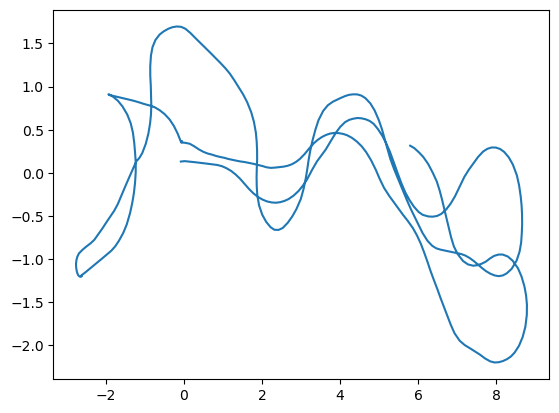

In [12]:
x_arr = [x['x'] for x in amcl_poses_df]
y_arr = [x['y'] for x in amcl_poses_df]

plt.plot(x_arr, y_arr)

## ----------------------------

In [13]:
def fetch_pcl_from_laser_scan(curr_laser_scan):
    pass
    

#### Read all the scans from the database and tag them

In [14]:
def simplify_pt(curr_pt):
    ans = dict()
    ans['x'] = curr_pt.x
    ans['y'] = curr_pt.y
    ans['z'] = curr_pt.z
    ans['intensity'] = curr_pt.intensity
    ans['index'] = curr_pt.index
    return ans

In [15]:
import json

In [16]:
import json
with open("exp_1/traj_df.json",'r') as fd:
    traj_df = json.load(fd)

In [17]:
len(traj_df)

2625

#### Create point clouds for all points in the database

In [18]:
traj_df[0]

{'ts': 1668427399.129318,
 'point_list': [{'x': 2.916569709777832,
   'y': 0.5917754173278809,
   'z': 0.0,
   'intensity': 47.0,
   'index': 0},
  {'x': 2.9185612201690674,
   'y': 0.6019973158836365,
   'z': 0.0,
   'intensity': 47.0,
   'index': 1},
  {'x': 2.9205172061920166,
   'y': 0.6122381687164307,
   'z': 0.0,
   'intensity': 47.0,
   'index': 2},
  {'x': 2.918525218963623,
   'y': 0.6216646432876587,
   'z': 0.0,
   'intensity': 47.0,
   'index': 3},
  {'x': 2.9243218898773193,
   'y': 0.6327766180038452,
   'z': 0.0,
   'intensity': 47.0,
   'index': 4},
  {'x': 2.9222636222839355,
   'y': 0.6422152519226074,
   'z': 0.0,
   'intensity': 47.0,
   'index': 5},
  {'x': 2.9240787029266357,
   'y': 0.6525183916091919,
   'z': 0.0,
   'intensity': 47.0,
   'index': 6},
  {'x': 2.9219565391540527,
   'y': 0.6619561314582825,
   'z': 0.0,
   'intensity': 47.0,
   'index': 7},
  {'x': 2.919804096221924,
   'y': 0.6713869571685791,
   'z': 0.0,
   'intensity': 47.0,
   'index': 8},


In [19]:
def fetch_pcd_obj(pcd_json):
    pts_arr = []
    master_pcd=o3d.geometry.PointCloud()
    for curr_elem in pcd_json:
        pts_arr.append([curr_elem['x'],curr_elem['y'], curr_elem['z'] ])
    master_pcd.points = o3d.utility.Vector3dVector(np.asarray(pts_arr))
    return master_pcd

In [20]:
query_pcd = fetch_pcd_obj(traj_df[0]['point_list'])

In [21]:
query_pcd

PointCloud with 895 points.

In [22]:
o3d.visualization.draw_geometries([query_pcd])

In [23]:
sorted([len(x['point_list']) for x in traj_df])[::]

[775,
 782,
 783,
 783,
 785,
 785,
 786,
 787,
 788,
 788,
 788,
 791,
 791,
 792,
 794,
 794,
 794,
 794,
 795,
 796,
 798,
 799,
 800,
 801,
 801,
 802,
 802,
 803,
 804,
 804,
 805,
 805,
 805,
 805,
 806,
 806,
 807,
 807,
 808,
 808,
 808,
 808,
 808,
 808,
 809,
 810,
 810,
 810,
 811,
 811,
 811,
 811,
 811,
 811,
 811,
 811,
 811,
 812,
 813,
 813,
 813,
 813,
 813,
 813,
 813,
 814,
 814,
 814,
 814,
 814,
 815,
 815,
 815,
 815,
 815,
 815,
 815,
 815,
 816,
 816,
 816,
 816,
 816,
 816,
 817,
 817,
 818,
 818,
 818,
 818,
 819,
 819,
 820,
 820,
 820,
 820,
 820,
 821,
 821,
 821,
 822,
 822,
 822,
 822,
 822,
 823,
 823,
 823,
 823,
 824,
 824,
 824,
 824,
 825,
 825,
 825,
 825,
 825,
 826,
 826,
 826,
 826,
 826,
 826,
 827,
 827,
 827,
 827,
 828,
 828,
 828,
 829,
 829,
 829,
 829,
 829,
 829,
 830,
 830,
 830,
 830,
 831,
 831,
 832,
 832,
 832,
 832,
 833,
 833,
 833,
 833,
 833,
 833,
 834,
 834,
 834,
 835,
 835,
 835,
 835,
 835,
 836,
 836,
 836,
 837,
 837,
 837

#### Load a query scan

In [24]:
query_pcd

PointCloud with 895 points.

In [25]:
#o3d.visualization.draw_geometries([query_pcd])

#### Loading all candidates

In [26]:
!ls

chcking_db.ipynb	global_registration_checker.ipynb
exp_1			icp_checker.ipynb
find_best_better.ipynb	points_df_high_res.json
find_best.ipynb		read_bag_files.ipynb


In [27]:
query_pcd.estimate_normals()

In [28]:
with open("points_df_high_res.json",'r') as fd:
    points_df = json.load(fd)

In [29]:
points_df[0]

{'y': -4.0,
 'x': -6.5,
 'point_list': [{'y': 0.2285391092300415,
   'x': 13.157899856567383,
   'intensity': 0.0,
   'z': 0.0,
   'index': 457},
  {'y': 0.26510289311408997,
   'x': 12.718616485595703,
   'intensity': 0.0,
   'z': 0.0,
   'index': 458},
  {'y': 0.3085187077522278,
   'x': 12.686367988586426,
   'intensity': 0.0,
   'z': 0.0,
   'index': 459},
  {'y': 0.3520301878452301,
   'x': 12.665358543395996,
   'intensity': 0.0,
   'z': 0.0,
   'index': 460},
  {'y': 0.3930138647556305,
   'x': 12.567913055419922,
   'intensity': 0.0,
   'z': 0.0,
   'index': 461},
  {'y': 0.3394556939601898,
   'x': 9.76894474029541,
   'intensity': 0.0,
   'z': 0.0,
   'index': 462},
  {'y': 0.3663821518421173,
   'x': 9.58449935913086,
   'intensity': 0.0,
   'z': 0.0,
   'index': 463},
  {'y': 0.3984094560146332,
   'x': 9.552915573120117,
   'intensity': 0.0,
   'z': 0.0,
   'index': 464},
  {'y': 0.43275997042655945,
   'x': 9.577398300170898,
   'intensity': 0.0,
   'z': 0.0,
   'index': 

In [30]:
points_df = list(filter(lambda x:len(x['point_list'])>0, points_df))

In [31]:
print("len is ", len(points_df))
for idx, curr_elem in enumerate(points_df):
    print(idx)
    curr_elem['pcd_obj'] = fetch_pcd_obj(curr_elem['point_list'])

len is  15321
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090


3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001


5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642


7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384


8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075


10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
1087

12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
1230

13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
1372

In [32]:
def fetch_icp_res(source, target, threshold=0.1):
    trans_init = np.asarray([[1, 0, 0, 0],
                             [0,1, 0,0],
                             [0, 0,1, 0], 
                             [0.0, 0.0, 0.0, 1.0]])
    reg_p2l = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint())
    return reg_p2l

In [220]:
from copy import deepcopy

In [424]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp],
                                      zoom=0.4559,
                                      front=[0.6452, -0.3036, -0.7011],
                                      lookat=[1.9892, 2.0208, 1.8945],
                                      up=[-0.2779, -0.9482, 0.1556])

def preprocess_point_cloud(pcd, voxel_size):
    #print(":: Downsample with a voxel size %.3f." % voxel_size)
    pcd_down = pcd.voxel_down_sample(voxel_size)

    radius_normal = voxel_size * 2
    #print(":: Estimate normal with search radius %.3f." % radius_normal)
    pcd_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))

    radius_feature = voxel_size * 5
    #print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
    pcd_fpfh = o3d.pipelines.registration.compute_fpfh_feature(
        pcd_down,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100))
    return pcd_down, pcd_fpfh

def prepare_dataset(source, target, voxel_size):
    print(":: Load two point clouds and disturb initial pose.")

    #demo_icp_pcds = o3d.data.DemoICPPointClouds()
    #source = o3d.io.read_point_cloud(demo_icp_pcds.paths[0])
    #target = o3d.io.read_point_cloud(demo_icp_pcds.paths[1])
    source = deepcopy(source)
    target = deepcopy(target)
    #trans_init = np.asarray([[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0],
    #[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
    #source.transform(trans_init)
    #draw_registration_result(source, target, np.identity(4))

    source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
    target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
    return source, target, source_down, target_down, source_fpfh, target_fpfh

def execute_global_registration(source_down, target_down, source_fpfh,
                                target_fpfh, voxel_size):
    #distance_threshold = voxel_size * 1.5
    distance_threshold = 50
    #print(":: RANSAC registration on downsampled point clouds.")
    #print("   Since the downsampling voxel size is %.3f," % voxel_size)
    print("   we use a liberal distance threshold %.3f." % distance_threshold)
    result = o3d.pipelines.registration.registration_ransac_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh, True,
        distance_threshold,
        o3d.pipelines.registration.TransformationEstimationPointToPoint(False),
        500, [
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnEdgeLength(
                0.9),
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnDistance(
                distance_threshold)
        ], o3d.pipelines.registration.RANSACConvergenceCriteria(1000, 1.0))
    return result

def refine_registration(source, target, source_fpfh, target_fpfh, voxel_size, resulting_ransac):
    #distance_threshold = voxel_size * 0.4
    distance_threshold = 2
    print(":: Point-to-plane ICP registration is applied on original point")
    print("   clouds to refine the alignment. This time we use a strict")
    print("   distance threshold %.3f." % distance_threshold)
    result = o3d.pipelines.registration.registration_icp(
        source, target, distance_threshold, resulting_ransac.transformation,
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    return result

### Find scores

In [222]:
scores_arr = []
for idx, curr_elem in enumerate(points_df[:]):
    print(idx)
    #print(curr_elem)
    curr_elem['pcd_obj'] = fetch_pcd_obj(curr_elem['point_list'])  
    curr_elem['pcd_obj'].estimate_normals()
    curr_elem['idx'] = idx
    
    voxel_size = 0.01  # means 1cm for this dataset
    source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(
        curr_elem['pcd_obj'], query_pcd,voxel_size)
    print("Points in original : ", np.asarray(curr_elem['pcd_obj'].points).shape)
    print("size of SRC downsampled points is: ", np.asarray(source_down.points).shape)
    print("size of TARGET downsampled points is: ", np.asarray(target_down.points).shape)
    result_ransac = execute_global_registration(source_down, target_down,
                                            source_fpfh, target_fpfh,
                                            voxel_size)
    
    result_icp = refine_registration(source, target, source_fpfh, target_fpfh,
                                 voxel_size, result_ransac)
    print(result_icp)
    evaluation = o3d.pipelines.registration.evaluate_registration(
    source, target, threshold, trans_init)
    #draw_registration_result(source, target, result_icp.transformation)

    #reg_p2l = fetch_icp_res(query_pcd, curr_elem['pcd_obj'])
    #reg_p2l = fetch_icp_res(curr_elem['pcd_obj'], query_pcd)
    reg_p2l = result_icp
    scores_arr.append([idx, reg_p2l])
    break

0
:: Load two point clouds and disturb initial pose.
Points in original :  (419, 3)
size of SRC downsampled points is:  (413, 3)
size of TARGET downsampled points is:  (852, 3)
   we use a liberal distance threshold 10.000.
:: Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. This time we use a strict
   distance threshold 2.000.
RegistrationResult with fitness=9.522673e-01, inlier_rmse=1.488801e+00, and correspondence_set size of 399
Access transformation to get result.


In [223]:
np.asarray(source_down.points).shape

(413, 3)

In [224]:
query_pcd

PointCloud with 895 points.

In [225]:
curr_elem['pcd_obj']

PointCloud with 419 points.

In [226]:
scores_arr = sorted(scores_arr, key=lambda x:-np.asarray(x[1].correspondence_set).shape[0])

In [227]:
scores_arr

[[0,
  RegistrationResult with fitness=9.522673e-01, inlier_rmse=1.488801e+00, and correspondence_set size of 399
  Access transformation to get result.]]

In [425]:
#points_df[5843]

### Tuning parameters to 5843 with query

In [426]:
def execute_fast_global_registration(source_down, target_down, source_fpfh,
                                     target_fpfh, voxel_size):
    distance_threshold = 10
    print(":: Apply fast global registration with distance threshold %.3f" \
            % distance_threshold)
    result = o3d.pipelines.registration.registration_fast_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh,
        o3d.pipelines.registration.FastGlobalRegistrationOption(
            maximum_correspondence_distance=distance_threshold))
    return result

In [427]:
curr_elem = points_df[5844]

In [428]:
points_df[5844]

{'y': 1.4000000000000048,
 'x': 0.09999999999997655,
 'point_list': [{'y': -2.9646193981170654,
   'x': 0.0023606508038938046,
   'intensity': 0.0,
   'z': 0.0,
   'index': 0},
  {'y': -2.9814276695251465,
   'x': 0.012729955837130547,
   'intensity': 0.0,
   'z': 0.0,
   'index': 1},
  {'y': -2.9601123332977295,
   'x': 0.022921131923794746,
   'intensity': 0.0,
   'z': 0.0,
   'index': 2},
  {'y': -2.9537031650543213,
   'x': 0.033131979405879974,
   'intensity': 0.0,
   'z': 0.0,
   'index': 3},
  {'y': -2.955989360809326,
   'x': 0.04342684522271156,
   'intensity': 0.0,
   'z': 0.0,
   'index': 4},
  {'y': -2.9725513458251953,
   'x': 0.05399796739220619,
   'intensity': 0.0,
   'z': 0.0,
   'index': 5},
  {'y': -2.96235728263855,
   'x': 0.06410647928714752,
   'intensity': 0.0,
   'z': 0.0,
   'index': 6},
  {'y': -2.961148977279663,
   'x': 0.07437136769294739,
   'intensity': 0.0,
   'z': 0.0,
   'index': 7},
  {'y': -2.9702658653259277,
   'x': 0.08492486923933029,
   'intens

In [429]:
#curr_elem = points_df[5843]
curr_elem = points_df[5843]

In [430]:
curr_elem.keys()

dict_keys(['y', 'x', 'point_list', 'theta', 'pcd_obj'])

In [431]:
query_pcd.paint_uniform_color([1, 0, 0])

PointCloud with 895 points.

In [432]:
o3d.visualization.draw_geometries([curr_elem['pcd_obj'], query_pcd])

In [433]:
voxel_size = 0.01  # means 1cm for this dataset
source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(
    curr_elem['pcd_obj'], query_pcd,voxel_size)
print("Points in original : ", np.asarray(curr_elem['pcd_obj'].points).shape)
print("size of SRC downsampled points is: ", np.asarray(source_down.points).shape)
print("size of TARGET downsampled points is: ", np.asarray(target_down.points).shape)


:: Load two point clouds and disturb initial pose.
Points in original :  (887, 3)
size of SRC downsampled points is:  (867, 3)
size of TARGET downsampled points is:  (852, 3)


In [434]:
source, target

(PointCloud with 887 points., PointCloud with 895 points.)

In [435]:
source_down, target_down

(PointCloud with 867 points., PointCloud with 852 points.)

In [436]:
result_ransac = execute_global_registration(source_down, target_down,
                                        source_fpfh, target_fpfh,
                                        voxel_size)

   we use a liberal distance threshold 50.000.


In [437]:
result_ransac

RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.

In [438]:
source_down.paint_uniform_color([1, 0, 0])
target_down.paint_uniform_color([0, 0, 1])

PointCloud with 852 points.

In [439]:
source_down, target_down

(PointCloud with 867 points., PointCloud with 852 points.)

In [440]:
o3d.visualization.draw_geometries([source_down, target_down])

In [441]:
result_ransac.transformation

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [442]:
draw_registration_result(source, target, result_ransac.transformation)

In [443]:
result_icp = refine_registration(source, target, source_fpfh, target_fpfh,
                                 voxel_size, result_ransac)

:: Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. This time we use a strict
   distance threshold 2.000.


In [444]:
print(result_icp)

RegistrationResult with fitness=4.937993e-01, inlier_rmse=7.446228e-01, and correspondence_set size of 438
Access transformation to get result.


In [445]:
draw_registration_result(source, target, result_icp.transformation)

In [446]:
result_icp

RegistrationResult with fitness=4.937993e-01, inlier_rmse=7.446228e-01, and correspondence_set size of 438
Access transformation to get result.